# Pymaceuticals Inc.
---

### Analysis

- For this drug experiment, we see that an equal amount of male and female test subjects were used to get an overall accurate result.
- The top two drugs being used in this study are Capomulin and Ramicane.
- Out of the four drugs closely looked at (Capomulin, Ramicane, Infubinol, Ceftamin), Capomulin and Ramicane are seen to be more effective in reducing tumors within the 45 day timestamp than Infubinol or Ceftamin. There was one case seen from Infubinol that had the similar reductions to Capomulin and Ramicane. However, this outlier could be caused from outside factors and not be a reduction from the drug alone.
- When we monitored the subject 'l509' over the 45 day period, it can be concluded that the drug Capomulin is effective in tumor reduction. The tumor starting at 45 mm3 and ending at 42mm3.
- It is also interesting to note that there is a positive correlation between weight and average tumor size. As the weight of the mouse increases, so does the tumor size.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results,mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
merge_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupID = merge_df[merge_df.duplicated(['Mouse ID','Timepoint'])]["Mouse ID"].unique()
dupID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df = merge_df.loc[merge_df["Mouse ID"].isin(dupID),:]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df.drop(duplicate_df.index)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_reg_df = cleaned_df.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drtumor_mean = drug_reg_df.mean()['Tumor Volume (mm3)']
drtumor_median = drug_reg_df.median()['Tumor Volume (mm3)']
drtumor_var = drug_reg_df.var()['Tumor Volume (mm3)']
drtumor_std = drug_reg_df.std()['Tumor Volume (mm3)']
drtumor_mean = drug_reg_df.mean()['Tumor Volume (mm3)']
drtumor_sem = drug_reg_df.sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.

summary_stats_df = pd.DataFrame({"Mean Tumor Volume": drtumor_mean,
                                "Median Tumor Volume": drtumor_median,
                                "Tumor Volume Variance": drtumor_var,
                                "Tumor Volume Std. Dev.": drtumor_std,
                                "Tumor Volume Std. Err.": drtumor_sem})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_df = drug_reg_df.agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

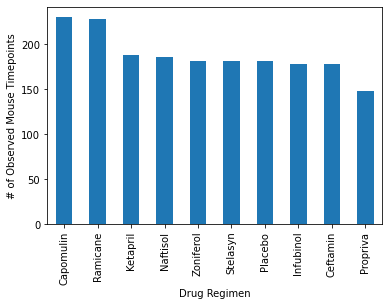

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bars_chart = drug_reg_df.count()['Timepoint'].sort_values(ascending=False)
bar_chart = bars_chart.plot(kind='bar')#, color='blue')
bar_chart.set_xlabel("Drug Regimen")
bar_chart.set_ylabel('# of Observed Mouse Timepoints')
plt.show()
#plt.tight_layout()

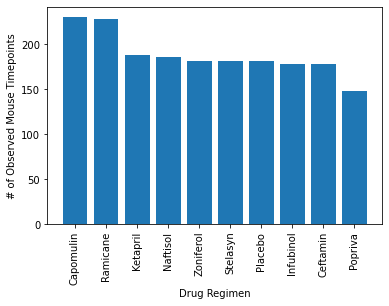

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_reg = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol',
            'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Popriva']
plt.bar(drug_reg, bars_chart)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)
plt.show()

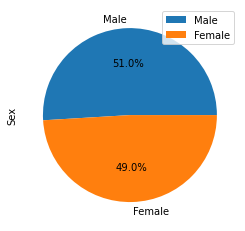

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
 ## get male and female indiv
male_mice = cleaned_df.loc[cleaned_df['Sex']=='Male'].count()['Mouse ID']
female_mice = cleaned_df.loc[cleaned_df['Sex']=='Female'].count()['Mouse ID']

versus_df = pd.DataFrame({'Sex': [male_mice, female_mice]}, index =["Male", "Female"])
distribution = versus_df.plot(kind='pie', y = 'Sex', autopct ='%1.1f%%')

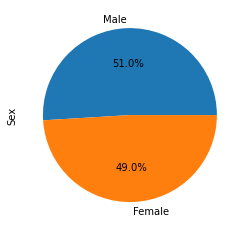

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
counts = [male_mice, female_mice]
plt.pie(counts, labels = labels, autopct ='%1.1f%%')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp_df = pd.DataFrame(cleaned_df.groupby(['Mouse ID'])['Timepoint'].max()).reset_index(drop=False)
#last_tp_df.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tum_vol_df = pd.merge(last_tp_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')
tum_vol_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
four_treats = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tum_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treats in four_treats:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tum_vol_temp = tum_vol_df.loc[tum_vol_df['Drug Regimen'] == treats, "Tumor Volume (mm3)"]
    # add subset 
    tum_vol.append(tum_vol_temp)
    # Determine outliers using upper and lower bounds
    quartiles = tum_vol_temp.quantile([.25,.5,.75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q - lower_q
    l_bound = lower_q - (1.5* iqr)
    u_bound = upper_q + (1.5* iqr)
    outlier = tum_vol_temp[(tum_vol_temp < l_bound)|(tum_vol_temp > u_bound)]
    
    print(f"{treats}'s potential outliers: {outlier}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


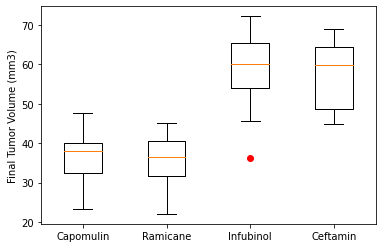

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(tum_vol, labels=four_treats, sym='red')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

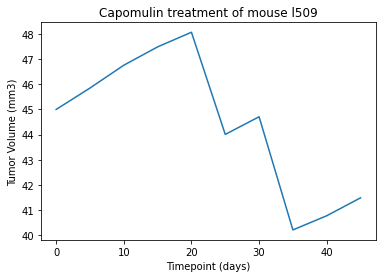

In [29]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'l509'
drug = 'Capomulin'
mouse_df = cleaned_df.loc[(cleaned_df['Mouse ID'] == mouse_id) & (cleaned_df['Drug Regimen'] == drug)]
#mouse_df

plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

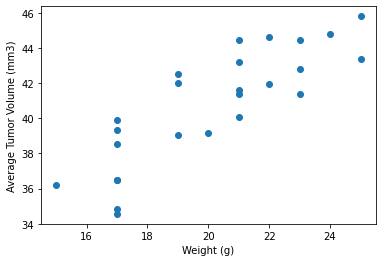

In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capo_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == 'Capomulin',:]
avg_capo = capo_df.groupby('Mouse ID').mean()

plt.scatter(avg_capo['Weight (g)'], avg_capo['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


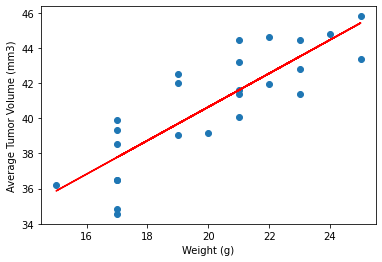

In [33]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cap_slope, cap_int, cap_r, cap_p, cap_std_err = st.linregress(avg_capo['Weight (g)'], avg_capo['Tumor Volume (mm3)'])
cap_fit = cap_slope * avg_capo['Weight (g)'] + cap_int

plt.plot(avg_capo['Weight (g)'], cap_fit, "r-")
plt.scatter(avg_capo['Weight (g)'], avg_capo['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(cap_r,2)}")
plt.show()